In [ ]:
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [ ]:
df = pd.read_csv("forest_fire.csv")
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,36.7330,36.2099,304.4,1.1,1.0,2020-01-10,1948,Terra,MODIS,60,6.03,280.9,10.8,N,2
1,38.0335,41.4860,302.1,3.3,1.7,2020-01-11,1106,Aqua,MODIS,51,6.03,282.5,38.7,D,0
2,37.7370,37.5192,301.5,1.8,1.3,2020-01-11,1106,Aqua,MODIS,45,6.03,283.9,14.9,D,0
3,37.7441,37.5235,303.6,1.8,1.3,2020-01-11,1106,Aqua,MODIS,49,6.03,283.7,16.6,D,0
4,41.2646,31.4250,305.8,1.0,1.0,2020-01-11,1107,Aqua,MODIS,0,6.03,286.7,9.0,D,2


In [ ]:
df.shape

(8834, 15)

In [ ]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [ ]:
df.describe()  

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,8834.000000,8834.000000,8834.000000,8834.000000,8834.000000,8834.000000,8834.000000,8.834000e+03,8834.000000,8834.000000,8834.000000
mean,37.910822,36.301929,320.697498,1.482850,1.172085,1152.329749,64.848313,6.030000e+00,300.998540,27.013833,0.142518
std,1.246701,4.342658,15.392054,0.699058,0.220570,442.448589,19.747290,7.176888e-13,10.183889,66.217968,0.516847
min,35.822100,25.781500,300.000000,1.000000,1.000000,2.000000,0.000000,6.030000e+00,268.300000,2.400000,0.000000
25%,37.084475,33.196725,308.600000,1.000000,1.000000,845.250000,54.000000,6.030000e+00,292.800000,8.200000,0.000000
50%,37.489250,37.457300,318.900000,1.200000,1.100000,1025.000000,66.000000,6.030000e+00,299.500000,13.500000,0.000000
75%,38.282275,39.723125,328.700000,1.600000,1.200000,1113.000000,77.000000,6.030000e+00,308.900000,26.500000,0.000000
max,41.942300,44.788000,500.000000,4.800000,2.000000,2357.000000,100.000000,6.030000e+00,330.900000,2787.600000,3.000000


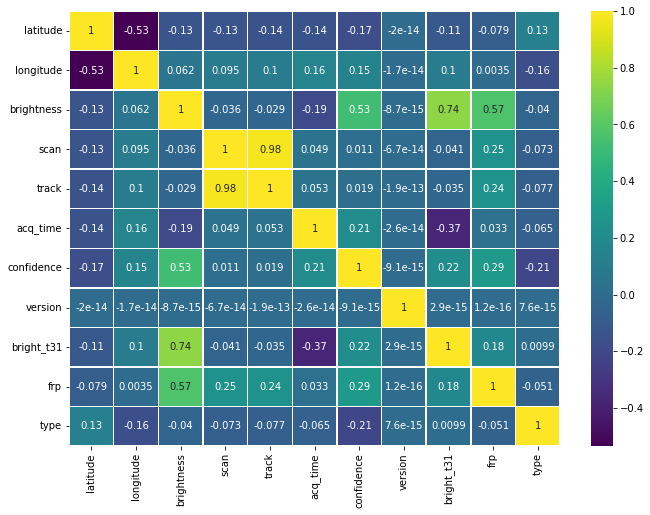

In [ ]:
plt.figure(figsize=(11,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis', linewidths=.5)

In [ ]:
df = df.drop(["track"], axis=1)
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,36.7330,36.2099,304.4,1.1,2020-01-10,1948,Terra,MODIS,60,6.03,280.9,10.8,N,2
1,38.0335,41.4860,302.1,3.3,2020-01-11,1106,Aqua,MODIS,51,6.03,282.5,38.7,D,0
2,37.7370,37.5192,301.5,1.8,2020-01-11,1106,Aqua,MODIS,45,6.03,283.9,14.9,D,0
3,37.7441,37.5235,303.6,1.8,2020-01-11,1106,Aqua,MODIS,49,6.03,283.7,16.6,D,0
4,41.2646,31.4250,305.8,1.0,2020-01-11,1107,Aqua,MODIS,0,6.03,286.7,9.0,D,2


In [ ]:
df['scan'].value_counts()

1.0    2405
1.1    1659
1.2     967
1.3     554
1.4     442
1.5     410
1.6     289
1.7     255
1.8     201
1.9     172
2.0     142
2.3     114
2.2     114
2.1     112
2.6      87
2.5      87
2.8      83
2.7      81
2.4      77
3.0      67
2.9      66
3.4      50
3.1      50
3.5      49
3.3      39
3.6      34
4.3      32
3.2      28
3.8      27
3.7      25
4.4      22
4.1      19
4.0      17
3.9      16
4.8      13
4.2      11
4.7       9
4.5       8
4.6       1
Name: scan, dtype: int64

In [ ]:
df['acq_time'].value_counts()

839     259
1054    241
1023    237
820     232
1036    225
       ... 
2327      1
33        1
2008      1
1944      1
1133      1
Name: acq_time, Length: 216, dtype: int64

In [ ]:
df['satellite'].value_counts()

Terra    4647
Aqua     4187
Name: satellite, dtype: int64

In [ ]:
df['instrument'].value_counts()

MODIS    8834
Name: instrument, dtype: int64

In [ ]:
df['version'].value_counts()

6.03    8834
Name: version, dtype: int64

In [ ]:
df['daynight'].value_counts()

D    7087
N    1747
Name: daynight, dtype: int64

In [ ]:
df = df.drop(["instrument", "version"], axis= 1)
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,36.7330,36.2099,304.4,1.1,2020-01-10,1948,Terra,60,280.9,10.8,N,2
1,38.0335,41.4860,302.1,3.3,2020-01-11,1106,Aqua,51,282.5,38.7,D,0
2,37.7370,37.5192,301.5,1.8,2020-01-11,1106,Aqua,45,283.9,14.9,D,0
3,37.7441,37.5235,303.6,1.8,2020-01-11,1106,Aqua,49,283.7,16.6,D,0
4,41.2646,31.4250,305.8,1.0,2020-01-11,1107,Aqua,0,286.7,9.0,D,2


In [ ]:
daynight_map = {"D":1, "N":0}
satellite_map = {"Terra":1, "Aqua":0}

df['daynight'] = df['daynight'].map(daynight_map)
df['satellite'] = df['satellite'].map(satellite_map)

df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,36.7330,36.2099,304.4,1.1,2020-01-10,1948,1,60,280.9,10.8,0,2
1,38.0335,41.4860,302.1,3.3,2020-01-11,1106,0,51,282.5,38.7,1,0
2,37.7370,37.5192,301.5,1.8,2020-01-11,1106,0,45,283.9,14.9,1,0
3,37.7441,37.5235,303.6,1.8,2020-01-11,1106,0,49,283.7,16.6,1,0
4,41.2646,31.4250,305.8,1.0,2020-01-11,1107,0,0,286.7,9.0,1,2


In [ ]:
df['type'].value_counts()

0    8208
2     619
3       7
Name: type, dtype: int64

In [ ]:
types = pd.get_dummies(df['type'])
df = pd.concat([df, types], axis=1)

df = df.drop(["type"], axis=1)
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,36.7330,36.2099,304.4,1.1,2020-01-10,1948,1,60,280.9,10.8,0,0,1,0
1,38.0335,41.4860,302.1,3.3,2020-01-11,1106,0,51,282.5,38.7,1,1,0,0
2,37.7370,37.5192,301.5,1.8,2020-01-11,1106,0,45,283.9,14.9,1,1,0,0
3,37.7441,37.5235,303.6,1.8,2020-01-11,1106,0,49,283.7,16.6,1,1,0,0
4,41.2646,31.4250,305.8,1.0,2020-01-11,1107,0,0,286.7,9.0,1,0,1,0


In [ ]:
 df = df.rename(columns={0:"type_0", 2:"type_2", 3:"type_3"})
 df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3
0,36.7330,36.2099,304.4,1.1,2020-01-10,1948,1,60,280.9,10.8,0,0,1,0
1,38.0335,41.4860,302.1,3.3,2020-01-11,1106,0,51,282.5,38.7,1,1,0,0
2,37.7370,37.5192,301.5,1.8,2020-01-11,1106,0,45,283.9,14.9,1,1,0,0
3,37.7441,37.5235,303.6,1.8,2020-01-11,1106,0,49,283.7,16.6,1,1,0,0
4,41.2646,31.4250,305.8,1.0,2020-01-11,1107,0,0,286.7,9.0,1,0,1,0


In [ ]:
bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]

df["scan_binned"] = pd.cut(df['scan'], bins = bins, labels = labels)
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,36.7330,36.2099,304.4,1.1,2020-01-10,1948,1,60,280.9,10.8,0,0,1,0,2
1,38.0335,41.4860,302.1,3.3,2020-01-11,1106,0,51,282.5,38.7,1,1,0,0,4
2,37.7370,37.5192,301.5,1.8,2020-01-11,1106,0,45,283.9,14.9,1,1,0,0,2
3,37.7441,37.5235,303.6,1.8,2020-01-11,1106,0,49,283.7,16.6,1,1,0,0,2
4,41.2646,31.4250,305.8,1.0,2020-01-11,1107,0,0,286.7,9.0,1,0,1,0,1


In [ ]:
df = df.drop(["scan"], axis=1)

df.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,36.7330,36.2099,304.4,2020-01-10,1948,1,60,280.9,10.8,0,0,1,0,2
1,38.0335,41.4860,302.1,2020-01-11,1106,0,51,282.5,38.7,1,1,0,0,4
2,37.7370,37.5192,301.5,2020-01-11,1106,0,45,283.9,14.9,1,1,0,0,2
3,37.7441,37.5235,303.6,2020-01-11,1106,0,49,283.7,16.6,1,1,0,0,2
4,41.2646,31.4250,305.8,2020-01-11,1107,0,0,286.7,9.0,1,0,1,0,1


In [ ]:
df['acq_date'] = pd.to_datetime(df['acq_date'])

df.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,36.7330,36.2099,304.4,2020-01-10,1948,1,60,280.9,10.8,0,0,1,0,2
1,38.0335,41.4860,302.1,2020-01-11,1106,0,51,282.5,38.7,1,1,0,0,4
2,37.7370,37.5192,301.5,2020-01-11,1106,0,45,283.9,14.9,1,1,0,0,2
3,37.7441,37.5235,303.6,2020-01-11,1106,0,49,283.7,16.6,1,1,0,0,2
4,41.2646,31.4250,305.8,2020-01-11,1107,0,0,286.7,9.0,1,0,1,0,1


In [ ]:
df['year'] = df['acq_date'].dt.year
df['month'] = df['acq_date'].dt.month
df['day'] = df['acq_date'].dt.day

df.head()

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year,month,day
0,36.7330,36.2099,304.4,2020-01-10,1948,1,60,280.9,10.8,0,0,1,0,2,2020,1,10
1,38.0335,41.4860,302.1,2020-01-11,1106,0,51,282.5,38.7,1,1,0,0,4,2020,1,11
2,37.7370,37.5192,301.5,2020-01-11,1106,0,45,283.9,14.9,1,1,0,0,2,2020,1,11
3,37.7441,37.5235,303.6,2020-01-11,1106,0,49,283.7,16.6,1,1,0,0,2,2020,1,11
4,41.2646,31.4250,305.8,2020-01-11,1107,0,0,286.7,9.0,1,0,1,0,1,2020,1,11


In [ ]:
df = df.drop(["acq_date", "acq_time", "bright_t31"], axis=1)
df.head()

,latitude,longitude,brightness,satellite,confidence,frp,daynight,type_0,type_2,type_3,scan_binned,year,month,day
0,36.7330,36.2099,304.4,1,60,10.8,0,0,1,0,2,2020,1,10
1,38.0335,41.4860,302.1,0,51,38.7,1,1,0,0,4,2020,1,11
2,37.7370,37.5192,301.5,0,45,14.9,1,1,0,0,2,2020,1,11
3,37.7441,37.5235,303.6,0,49,16.6,1,1,0,0,2,2020,1,11
4,41.2646,31.4250,305.8,0,0,9.0,1,0,1,0,1,2020,1,11


In [ ]:
x = df.drop(["confidence"], axis=1)
y = df["confidence"]

In [ ]:
x.shape

(8834, 13)

In [ ]:
x.head()

,latitude,longitude,brightness,satellite,frp,daynight,type_0,type_2,type_3,scan_binned,year,month,day
0,36.7330,36.2099,304.4,1,10.8,0,0,1,0,2,2020,1,10
1,38.0335,41.4860,302.1,0,38.7,1,1,0,0,4,2020,1,11
2,37.7370,37.5192,301.5,0,14.9,1,1,0,0,2,2020,1,11
3,37.7441,37.5235,303.6,0,16.6,1,1,0,0,2,2020,1,11
4,41.2646,31.4250,305.8,0,9.0,1,0,1,0,1,2020,1,11


In [ ]:
y

0       60
1       51
2       45
3       49
4        0
        ..
8829    40
8830    46
8831    31
8832    63
8833    70
Name: confidence, Length: 8834, dtype: int64

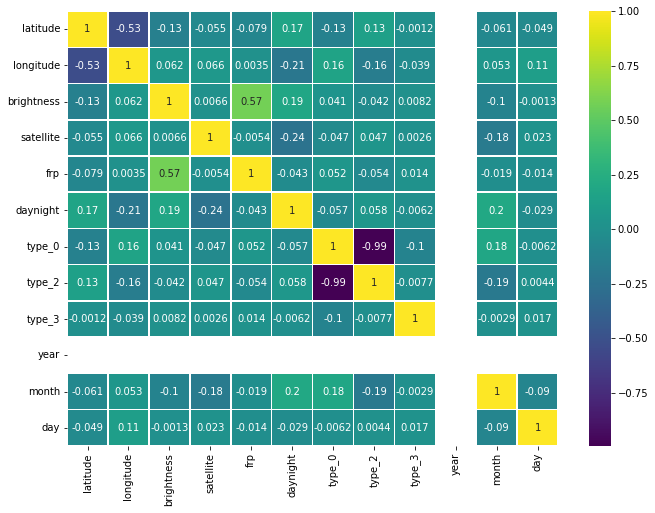

In [ ]:
plt.figure(figsize=(11,8))
sns.heatmap(x.corr(),annot=True,cmap='viridis', linewidths=.5)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=0)

In [ ]:
model = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200, n_jobs=-1, random_state=42)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
accuracy_score = round(model.score(x_train, y_train)*100,2)
print("accuracy_score:",accuracy_score)

accuracy_score: 95.71


In [ ]:
accuracy_score1 = round(model.score(x_test, y_test)*100,2)
print("accuracy_score1:",accuracy_score1)

accuracy_score1: 70.99


In [ ]:
"""
import pickle

###saved_model = pickle.dump(model,open("forest.pickle", 'wb'))

In [ ]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 200,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

##number of tree in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 300, num = 20)]

##number of feature to consider at every split
max_features = ["auto", "sqrt"]

##maximum number of level in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)

##minimum number of sample required to split a node
min_samples_split = [2, 3, 5]

##minimum number of sample required to each leaf node
min_samples_leaf = [1, 2, 4]

##create random_ grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,}
              
print(random_grid)

{'n_estimators': [100, 110, 121, 131, 142, 152, 163, 173, 184, 194, 205, 215, 226, 236, 247, 257, 268, 278, 289, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
random = RandomizedSearchCV(estimator=model, param_distributions=random_grid,scoring='neg_mean_squared_error', n_iter=30, cv= 3, verbose=2, random_state=42)
random.fit(x_train, y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   4.8s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   3.3s
[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=215; total time=   3.4s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   4.3s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   4.4s
[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=236; total time=   4.2s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=278; total time=   2.2s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=278

RandomizedSearchCV(cv=3,
                   estimator=RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                                   random_state=42),
                   n_iter=30,
                   param_distributions={'max_depth': [15, 18, 21, 25, 28, 31,
                                                      35, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [100, 110, 121, 131,
                                                         142, 152, 163, 173,
                                                         184, 194, 205, 215,
                                                         226, 236, 247, 257,
                                                         268, 278, 289, 300]},
                   random_state=42, scoring='neg_

In [ ]:
random.best_params_

{'max_depth': 35,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 278}

In [ ]:
random_new = RandomForestRegressor(n_estimators=278, min_samples_split=3, min_samples_leaf=1, max_features='sqrt', max_depth=35, bootstrap=True)
random_new.fit(x_train, y_train)

RandomForestRegressor(max_depth=35, max_features='sqrt', min_samples_split=3,
                      n_estimators=278)

In [ ]:
y_pred1 = random_new.predict(x_test)

In [ ]:
new_accuracy_score = round(random_new.score(x_train, y_train)*100,2)
print("accuracy_score:",new_accuracy_score)

accuracy_score: 94.36


In [ ]:
new_accuracy_score1 = round(random_new.score(x_test, y_test)*100,2)
print("accuracy_score:",new_accuracy_score1)

accuracy_score: 71.39


In [ ]:
import pickle

saved_model = pickle.dump(random_new,open("forest.pickle", 'wb'))

In [ ]:
pip install bz2file

  Created wheel for bz2file: filename=bz2file-0.98-py3-none-any.whl size=6883 sha256=c02ba8ffc8f88e50a60044280d07cb569d87f491f467226142d09d10155c0bea
  Stored in directory: /root/.cache/pip/wheels/85/ce/8d/b5f76b602b16a8a39f2ded74189cf5f09fc4a87bea16c54a8b
Successfully built bz2file


In [ ]:
import bz2

compressionLevel = 9
source_file = "forest.pickle"
destination_file = 'forest.bz2'

with open(source_file, 'rb') as data:
  tarbz2contents = bz2.compress(data.read(), compressionLevel)

fh = open(destination_file, "wb")
fh.write(tarbz2contents)
fh.close()